In [380]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns

In [383]:
# define function for reversing lists
def Reverse(lst): 
    new_lst = lst[::-1] 
    return new_lst 

In [381]:
# create dataframes for closing price and dates from .csv for BTC
btc_df = pd.read_csv('Binance_BTCUSDT_d.csv', usecols=['date','close'])
btc_date_df = pd.read_csv('Binance_BTCUSDT_d.csv', usecols=['date'])
btc_closePrice_df = pd.read_csv('Binance_BTCUSDT_d.csv', usecols=['close'])

In [382]:
# create dataframes for closing price and dates from .csv for Cardano
ada_df = pd.read_csv('Binance_ADAUSDT_d.csv', usecols=['date','close'])
ada_date_df = pd.read_csv('Binance_ADAUSDT_d.csv', usecols=['date'])
ada_closePrice_df = pd.read_csv('Binance_ADAUSDT_d.csv', usecols=['close'])

In [384]:
# convert BTC date/time dataframe to list
btcDateList = btc_date_df.values.tolist()
delistBtcDateList = []

# remove time from date list
for i in range (0, len(btcDateList)):
    delistBtcDateList.append(btcDateList[i][0].split(' ')[0])

# reverse both lits to get chronological ordering
formatBtcDateList = Reverse([dt.datetime.strptime(d,'%m/%d/%Y').date() for d in delistBtcDateList])
btcClosePriceList = Reverse(btc_closePrice_df.values.astype(float).tolist())


In [385]:
# convert Cardano date/time dataframe to list
adaDateList = ada_date_df.values.tolist()
delistAdaDateList = []

# remove time from date list
for i in range (0, len(adaDateList)):
    delistAdaDateList.append(adaDateList[i][0].split(' ')[0])

# reverse both lits to get chronological ordering
formatAdaDateList = Reverse([dt.datetime.strptime(d,'%m/%d/%Y').date() for d in delistAdaDateList])
adaClosePriceList = Reverse(ada_closePrice_df.values.tolist())

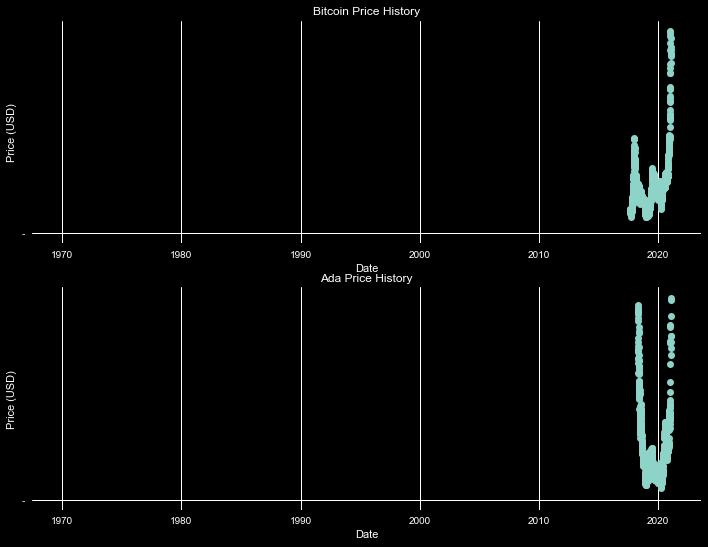

In [386]:
from matplotlib import rcParams
cParams['figure.figsize'] = 12,9

fig, axs = plt.subplots(2, 1, constrained_layout=True)

axs[0].plot(formatBtcDateList, btcClosePriceList, 'o', '-')
axs[0].set_title('Bitcoin Price History')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price (USD)')
# fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1].plot(formatAdaDateList, adaClosePriceList, 'o', '-')
axs[1].set_title('Ada Price History')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price (USD)')

plt.show()

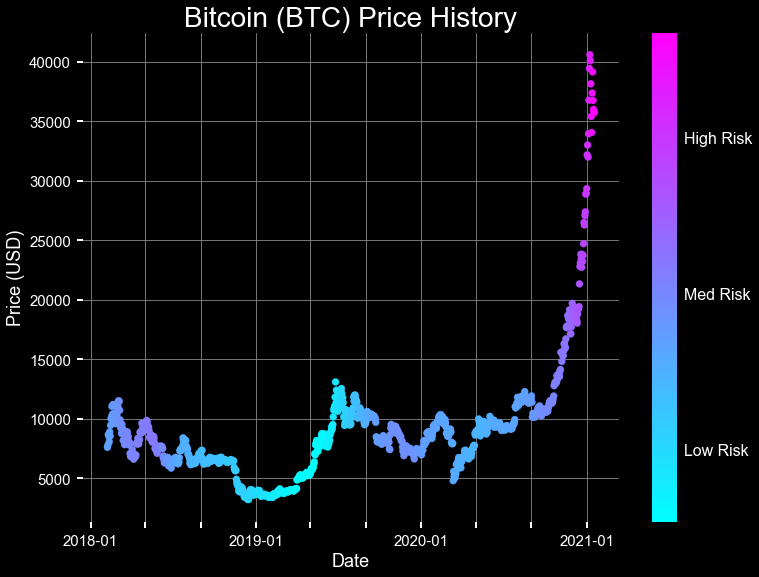

<Figure size 864x648 with 0 Axes>

In [387]:
# moving average risk color map list
ma175riskBtc = []

# buffer first 175 values with 0
for i in range (0, 175):
    ma175riskBtc.append(i)

# calculate moving average for previous 175 days for each location
for i in range (175, len(btcClosePriceList)):
    movingAvgBtc_sum = 0
    for j in range (0, 175):
        movingAvgBtc_sum = movingAvgBtc_sum + int(btcClosePriceList[i-j][0])

    movingAvgBtc = movingAvgBtc_sum/175
    ma175riskBtc.append(movingAvgBtc)

# remove the first 175 values
for i in range (0,175):
    formatBtcDateList.pop(0)
    btcClosePriceList.pop(0)
    ma175riskBtc.pop(0)

# set background color
plt.style.use('dark_background')

# scatter plot with color map
plt.scatter(formatBtcDateList, btcClosePriceList, c = ma175riskBtc, cmap = 'cool')
    
# naming the x axis  
plt.xlabel('Date', fontsize = 18) 

# naming the y axis  
plt.ylabel('Price (USD)', fontsize = 18)

# giving a title to my graph  
plt.title('Bitcoin (BTC) Price History', fontsize = 28)  

# change size/color of ticks on x and y
plt.tick_params(direction='out', length=6, width=2, colors='white', grid_color='gray', grid_alpha=0.9, labelsize = 15, pad = 6)

# remove every nth tick label for date to improve readability
ax = plt.gca()
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)

# function to show the plot
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['Low Risk','','Med Risk','','High Risk'], fontsize = 16)
plt.show()
plt.savefig('btcTest.png', dpi=600)


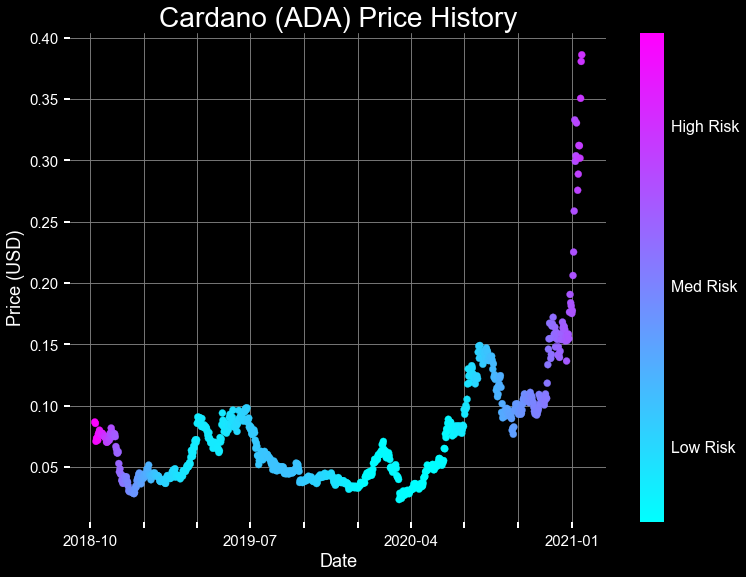

<Figure size 864x648 with 0 Axes>

In [388]:
# moving average risk color map list
ma175riskAda = []

# buffer first 175 values with 0
for i in range (0, 175):
    ma175riskAda.append(i)

# calculate moving average for previous 175 days for each location
for i in range (175, len(adaClosePriceList)):
    movingAvgAda_sum = 0
    for j in range (0, 175):
        movingAvgAda_sum = movingAvgAda_sum + float(adaClosePriceList[i-j][0])

    movingAvgAda = movingAvgAda_sum/175
    ma175riskAda.append(movingAvgAda)

# remove the first 175 values
for i in range (0,175):
    formatAdaDateList.pop(0)
    adaClosePriceList.pop(0)
    ma175riskAda.pop(0)

# set background color
plt.style.use('dark_background')

# scatter plot with color map
plt.scatter(formatAdaDateList, adaClosePriceList, c = ma175riskAda, cmap = 'cool')
    
# naming the x axis  
plt.xlabel('Date', fontsize = 18) 

# naming the y axis  
plt.ylabel('Price (USD)', fontsize = 18)

# giving a title to my graph  
plt.title('Cardano (ADA) Price History', fontsize = 28)  

# change size/color of ticks on x and y
plt.tick_params(direction='out', length=6, width=2, colors='white', grid_color='gray', grid_alpha=0.9, labelsize = 15, pad = 6)

# remove every nth tick label for date to improve readability
ax = plt.gca()
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)

# function to show the plot
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['Low Risk','','Med Risk','','High Risk'], fontsize = 16)
plt.show()
plt.savefig('adaTest.png', dpi=600)